In [1]:
# "engelsa_35.pickle" 6
# "engelsa_37.pickle" 6
# "gaydara_1.pickle" 3
# "gaydara_22.pickle" 2
# "gaydara_26.pickle" 4
# "gaydara_28.pickle" 5
# "gaydara_30.pickle" 5
# "gaydara_32.pickle" 5
# "kuibysheva_10.pickle" 3
# "kuibysheva_14.pickle" 3
# "kuibysheva_16.pickle" 3
# "kuibysheva_8.pickle" 3

In [2]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from boiler.constants import column_names
from boiler.data_processing.beetween_filter_algorithm import FullClosedTimestampFilterAlgorithm
from dateutil.tz import gettz

import config

In [8]:
start_datetime = datetime.datetime(2018, 12, 1, 0, 0, 0, tzinfo=gettz(config.DEFAULT_TIMEZONE))
end_datetime = datetime.datetime(2019, 4, 1, 0, 0, 0, tzinfo=gettz(config.DEFAULT_TIMEZONE))
boiler_round_step = 0.1

dataset_name = "engelsa_37.pickle"
lag = 6

start_datetime = pd.Timestamp(start_datetime)
end_datetime = pd.Timestamp(end_datetime)

filter_algorithm = FullClosedTimestampFilterAlgorithm()

boiler_df = pd.read_pickle(config.BOILER_PREPROCESSED_HEATING_CIRCUIT_DATASET_PATH)
boiler_df = filter_algorithm.filter_df_by_min_max_timestamp(boiler_df, start_datetime, end_datetime)
boiler_forward_temp = boiler_df[column_names.FORWARD_TEMP].to_numpy()

dataset_path = f"{config.APARTMENT_HOUSE_PREPROCESSED_DATASETS_HEATING_CIRCUIT_DIR}\\{dataset_name}"
home_df = pd.read_pickle(dataset_path)
home_df = filter_algorithm.filter_df_by_min_max_timestamp(home_df, start_datetime, end_datetime)
home_forward_temp = home_df[column_names.FORWARD_TEMP].to_numpy()

moved_boiler_temp = boiler_forward_temp[:-lag]
moved_home_temp = home_forward_temp[lag:]

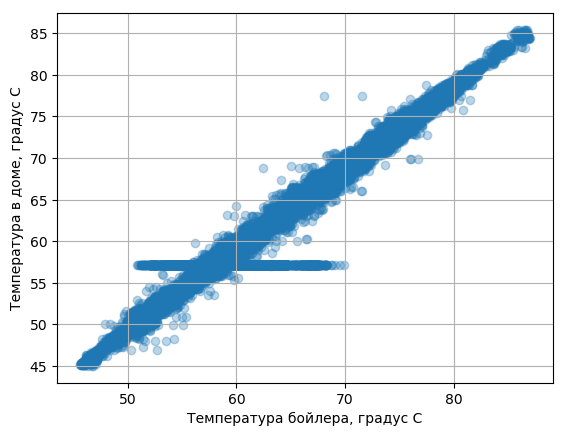

In [17]:
plt.scatter(moved_boiler_temp, moved_home_temp, alpha=0.3)
plt.xlabel("Температура бойлера, градус С")
plt.ylabel("Температура в доме, градус С")
plt.grid(True)
plt.show()

Lin Reg MSE 1.209280014038086
Lin Reg coeff_[0.96295094]


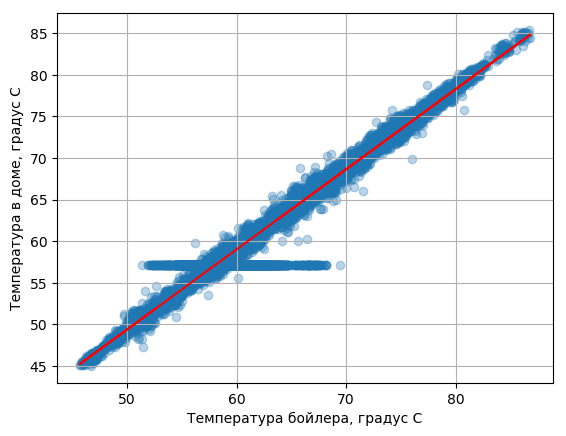

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

X, Y = moved_boiler_temp, moved_home_temp

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)
y_pred = lin_reg.predict(X_test.reshape(-1, 1))
mse = MSE(y_test, y_pred2)
print(f"Lin Reg MSE {mse}")
print(f"Lin Reg coeff_{lin_reg.coef_}")

plt.xlabel("Температура бойлера, градус С")
plt.ylabel("Температура в доме, градус С")
plt.scatter(X_test, y_test, alpha=0.3)
plt.plot(X_test, y_pred, "-r")
plt.grid(True)
plt.show()